In [1]:
using PyPlot

__Ejercicio 1:__

Primero, recordemos el método de Runge-Kutta de orden 4, el cual ya se había programado en tareas anteriores.

In [2]:
#Definimos el método de Runge-Kutta de orden 4 para funciones de cualquier dimensión. Las entradas son: f, la función que nos da la derivada;listt,el arreglo de t's; y x0, el valor inicial.
function rk_4(f,listt,x0)
    
#Definimos h como la distancia entra las dos primeras entradas de listt.
    h=listt[2]-listt[1]
#Definimos x como nuestro valor inicial (arreglo de valores iniciales)    
    x=x0
    
#Definimos listx como un objeto de tipo indefinido. Aquí es donde iremos guardando los puntos de la solución.
    listx=[]
    
#Guardamos nuestro valor inicial en listx
    push!(listx,x)

#el siguiente for es para aplicar la relación de recurrencia
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+h/2)
        k3=f(x+(h/2)*k2,listt[i]+h/2)
        k4=f(x+h*k3,listt[i+1])
        
        x=x+(h/6)*(k1+2*k2+2*k3+k4)
        
 #Cada que aplicamos la relación de recurrencia, vamos guardando el punto en listx.       
        push!(listx,x)
    end
#la función regresa el arreglo de x's
    return listx
end;

Queremos resolver el sistema:
\begin{align*}
\dot x &= y-y^3\\
\dot y &= -x -y^2
\end{align*}

Es decir $\frac{d \vec x}{d t}=\vec{F}(\vec{x},t),$ con $\vec{x}= (x, y)^{\text{T}}$ y $\vec{F}(\vec{x},t)=(y-y^3,-x -y^2)^{\text{T}}.$

In [3]:
#Definimos la función que nos da la derivada
F(x,t)=[x[2]-(x[2])^3,-x[1]-(x[2])^2];

In [4]:
#Definimos una lista de t's
ttlist=0:0.01:30;

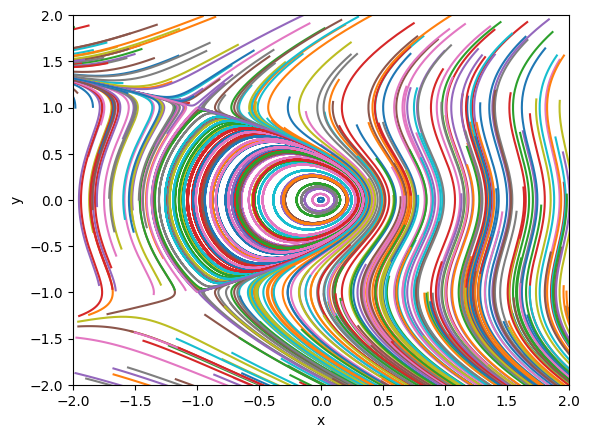

In [5]:
#Usamos el for para graficar varias condiciones iniciales.
for i in 1:400
    
    #x0 y y0 van de -2 a 2 de forma aleatoria
    x0=2*(2*rand()-1)
    y0=2*(2*rand()-1)
    
    #Usamos map para obtener la entrada correspondiente
    x_list=map(x->x[1],rk_4(F,ttlist,[x0,y0]))
    y_list=map(x->x[2],rk_4(F,ttlist,[x0,y0]))
    
    #Graficamos
    plot(x_list,y_list)
end

#Ajustamos los límites de los ejes
axes()[:set_xlim]([-2,2])
axes()[:set_ylim]([-2,2])

xlabel("x")
ylabel("y")
show();

Ahora calculamos el jacobiano de $\vec F=\left(y-y^3,-x-y^2 \right)^{\text{T}}$.

Veamos que $$  J=\left(\begin{array}{cc} 0 & 1-3y^{2} \\-1 & -2y \end{array} \right).$$

Evaluando en $\vec{0}$ (el cual es un punto fijo), tenemos que
$$ \left. J\right|_{x=0,y=0}= \left(\begin{array}{cc} 0 & 1 \\-1 & 0 \end{array} \right).$$

De lo anterior, se tiene que el determinante es $\Delta=1$, mientras que la traza es $\tau=0$. Por lo tanto, $\vec{0}$ se trata de un centro (por la gráfica mostrada en clase). Esto se puede comprobar observando la gráfica anterior.

----
__Ejercicio 2:__

Queremos resolver
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0,$$
con $\mu = 0.5$. Esta ecuación es equivalente al sistema

$$\dot{x}=u,$$
$$\dot{u}=\mu(1-x^2)u-x.$$

Es decir, $\frac{d \vec x}{d t}=\vec{G}(\vec{x},t),$ con $\vec{x}= (x, u)^{\text{T}}$ y $\vec{G}(\vec{x},t)=(u,\mu(1-x^2)u-x)^{\text{T}}.$

In [6]:
#Definimos la función que nos da la derivada
G(x,t)=[x[2],0.5*(1-(x[1])^2)*x[2]-x[1]];

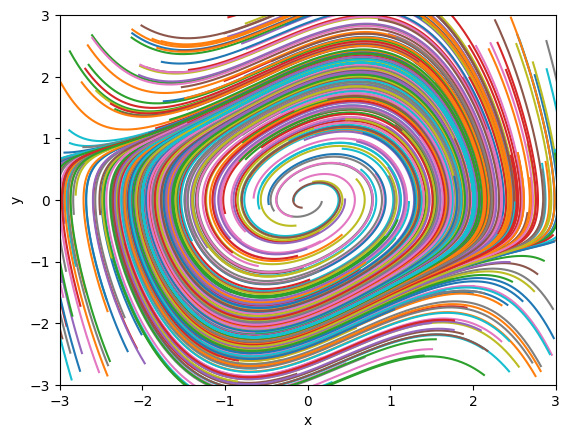

In [7]:
#Usamos for para graficar varias condiciones iniciales.

for i in 1:400
    #x0 y y0 van de -3 a 3 de forma aleatoria
    x0=3*(2*rand()-1)
    y0=3*(2*rand()-1)
    
    #Usamos map para obtener la entrada correspondiente. Usamos la misma lista de t's que en el ejercicio anterior
    x_list=map(x->x[1],rk_4(G,ttlist,[x0,y0]))
    y_list=map(x->x[2],rk_4(G,ttlist,[x0,y0]))
    
    #Graficamos
    plot(x_list,y_list)
end

#Ajustamos los límites de los ejes
axes()[:set_xlim]([-3,3])
axes()[:set_ylim]([-3,3])

xlabel("x")
ylabel("y")
show();

De nuestra función $\vec{G}$, se puede ver que $\vec{0}$ es un punto fijo.
Y de la gráfica anterior se puede "intuir" que $\vec{0}$ se trata de una espiral inestable.

Podemos comprobar esto de la siguiente forma:

Calculamos el jacobiano de $\vec{G}$

$$  J=\left(\begin{array}{cc} 0 & 1 \\-2\mu x u-1 & \mu (1-x^{2}) \end{array} \right).$$

Evaluamos en $\vec{x}=\vec{0}$
$$ \left. J\right|_{x=0,y=0}= \left(\begin{array}{cc} 0 & 1 \\-1 & \mu  \end{array} \right).$$

De este modo, el determinante será $\Delta=1$ y la traza será $\tau=\mu=0.5$

$$\implies \tau^{2}-4\Delta= 0.25-4<0$$

Y como además $\Delta>0$ y $\tau>0$, entonces comprobamos que se trata de una espiral inestable (de acuerdo al diagrama visto en clase).



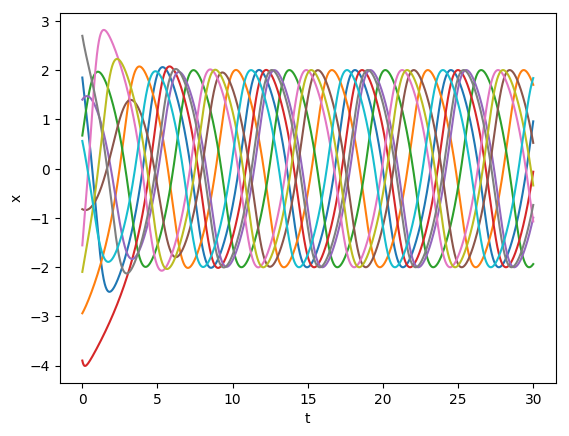

In [8]:
#Ahora graficamos posición contra tiempo
#Usamos el for para graficar varias condiciones iniciales. En este caso sólo usamos 10 para poder distinguir las gráficas 
for i in 1:10
    #x0 y y0 van de -4 a 4 de forma aleatoria
    x0=4*(2*rand()-1)
    y0=4*(2*rand()-1)
    
    #Usamos map para obtener la entrada correspondiente. Usamos la misma lista de t's que en los ejercicios anteriores
    x_list=map(x->x[1],rk_4(G,ttlist,[x0,y0]))
    
    #Graficamos
    plot(ttlist,x_list)
end

xlabel("t")
ylabel("x")
show();

----
__Ejercicio 3:__

Queremos resolver el sistema
$$\dot{x}=x+y-x(x^{2}+y^{2})$$
$$\dot{y}=-(x-y)-y(x^{2}+y^{2}).$$

O, equivalentemente,

$$\frac{d \vec x}{d t}=\vec{H}(\vec{x},t),$$

con $\vec{x}= (x, y)^{\text{T}}$ y $\vec{H}(\vec{x},t)=(x+y-x(x^{2}+y^{2}),-(x-y)-y(x^{2}+y^{2}))^{\text{T}}.$

In [9]:
#Definimos la función que nos da la derivada
H(x,t)=[x[1]+x[2]-x[1]*((x[1])^2+(x[2])^2),-(x[1]-x[2])-x[2]*((x[1])^2+(x[2])^2)];

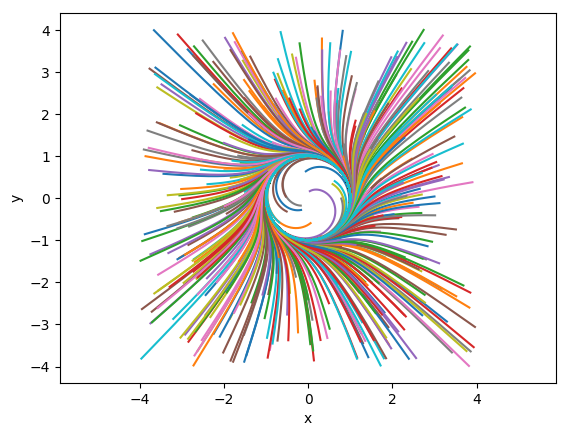

In [10]:
#Usamos el for para graficar varias condiciones iniciales. 
for i in 1:400
    #x0 y y0 van de -4 a 4 de forma aleatoria
    x0=4*(2*rand()-1)
    y0=4*(2*rand()-1)
    
    #Usamos map para obtener la entrada correspondiente. Usamos la misma lista de t's que en los ejercicios anteriores
    x_list=map(x->x[1],rk_4(H,ttlist,[x0,y0]))
    y_list=map(x->x[2],rk_4(H,ttlist,[x0,y0]))
    
    #Graficamos
    plot(x_list,y_list)
end

#Ajustamos los límites de los ejes
xlim(-3,3)
ylim(-3,3)
axis("equal")
xlabel("x")
ylabel("y")
show();

Consideremos el cambio de variable

$$x=r\cos(\theta),$$
$$y=r\sin(\theta).$$

En clase se mostró que el sistema de ecuaciones original es equivalente a 

$$\dot{r}=r-r^{3},$$
$$\dot{\theta}=-1.$$

La ecuación para $\theta$ se puede resolver fácilmente, dando como resultado
$$\theta(t)=\theta_{0}-t.$$

De aquí se puede concluir que en el espacio $(x,y)$, las soluciones giraran en el sentido de las manecillas del reloj a un ritmo constante.

Por otra parte, de la ecuación para $r$ podemos ver que $r=0$ es un punto fijo. Si se tiene que $f(r)=r-r^{3}$, entonces $f'(r)=1-3r^{2}.$
$$\implies f'(r=0)=1>0.$$
Por lo que $r=0$ es un repulsor.


Finalmente, podemos notar que $f(r=1)=0$, por lo que se trata de otro punto fijo. Véase que
$$f'(r=1)=-2<0.$$
Por lo tanto, $r=1$ es un atractor.

De este modo, notamos que todas nuestras observaciones anteriores coinciden con el comportamiento mostrado en la gráfica anterior.

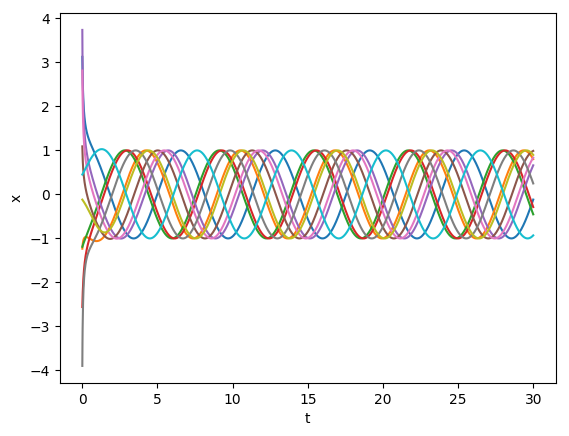

In [11]:
#Ahora graficamos posición contra tiempo
#Usamos el for para graficar varias condiciones iniciales. En este caso sólo usamos 10 para poder distinguir las gráficas 
for i in 1:10
    #x0 y y0 van de -4 a 4 de forma aleatoria
    x0=4*(2*rand()-1)
    y0=4*(2*rand()-1)
    
    #Usamos map para obtener la entrada correspondiente. Usamos la misma lista de t's que en los ejercicios anteriores
    x_list=map(x->x[1],rk_4(H,ttlist,[x0,y0]))
    
    #Graficamos
    plot(ttlist,x_list)
end

xlabel("t")
ylabel("x")
show();
